In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [3]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename='578.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

In [7]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is E6D5-B5DA

 Directory of c:\Users\Soundarya.K\Desktop\SEM 4\NLP SWE 1017\Language Detection System\Audio-Classification-main

24-04-2022  18:02    <DIR>          .
24-04-2022  18:06    <DIR>          ..
21-04-2022  11:41           882,698 578.wav
24-04-2022  18:01         2,434,629 Audio Classification EDA.ipynb
24-04-2022  17:05    <DIR>          new
24-04-2022  18:01           125,787 Part 2- Audio Classification Data Preprocessing And Model Creation.ipynb
23-04-2022  00:18           146,754 Part 2- Audio Classification Data Preprocessing.ipynb
               4 File(s)      3,589,868 bytes
               3 Dir(s)  49,813,352,448 bytes free


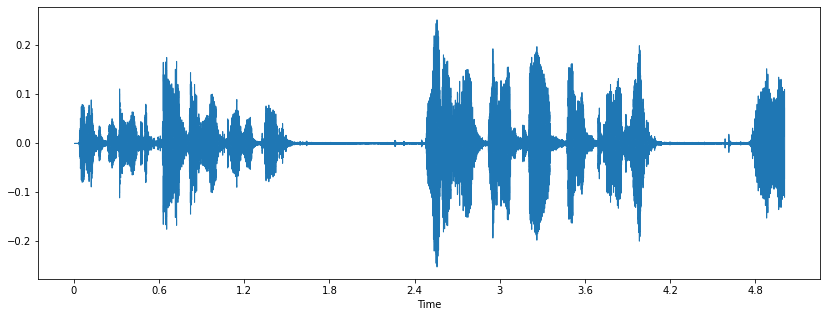

In [8]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

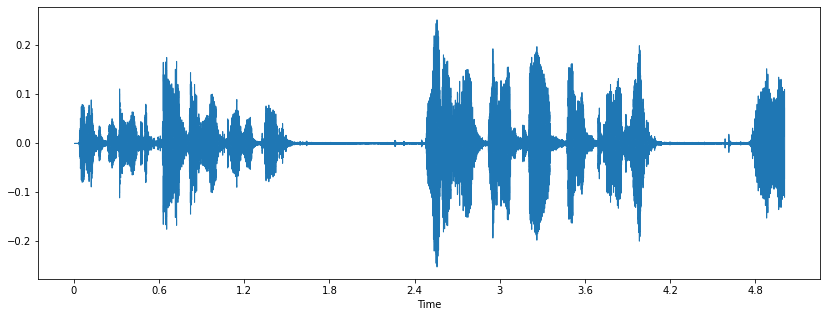

In [9]:
### Sound
filename='578.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [10]:
sample_rate


22050

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [12]:
wave_sample_rate

44100

In [13]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-572, -572],
       [-590, -590],
       [-636, -636]], dtype=int16)

In [14]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.01656511,
       -0.01904389,  0.        ], dtype=float32)

In [15]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:

import pandas as pd
import pathlib
import os

wavFiles = pathlib.Path.home()/'Desktop'/'SEM 4'/'NLP SWE 1017'/'Language Detection System'/'Audio-Classification-main'/'data'
def getFilesInDir(directory):
    files =[]
    files = os.listdir(directory)
    return files
fileNames = getFilesInDir("C:/Users/Soundarya.K/Desktop/SEM 4/NLP SWE 1017/Language Detection System/Audio-Classification-main/data")
def countInsta(keyword,arr):
    s=sum(keyword in s for s in arr)
    return s

bengalicount = countInsta('bengali',fileNames)
telugucount = countInsta('tem_',fileNames)
tamilcount = countInsta('tag_',fileNames)
gujaraticount = countInsta('guf_',fileNames)
kannadacount = countInsta('knf_',fileNames)
konkinicount = countInsta('konkini',fileNames)
marathicount = countInsta('marathi',fileNames)
malayalamcount = countInsta('malayalam',fileNames)
hinidcount = countInsta('hindi',fileNames)

fileNames = getFilesInDir(wavFiles)
sample_rate=["22050"]*len(fileNames)
label_bengali =['Ben']*bengalicount
label_telugu =['Tel']*telugucount
label_tamil =['Tam']*tamilcount
label_gujarati=['Guj']*gujaraticount
label_kannada =['kan']*kannadacount
label_konkini =['kon']*konkinicount
label_marathi =['mar']*marathicount
label_malayalam=['mal']*malayalamcount
label_hindi =['hin']*hinidcount
length=[1]*len(fileNames)
label =label_bengali+label_gujarati+label_hindi+label_kannada+label_konkini+label_malayalam +label_marathi+label_tamil+label_telugu
a = {'filename':fileNames,'sr':sample_rate,'class':label,'length':length}
df=pd.DataFrame.from_dict(a,orient='index')
df=df.transpose()
print(df)
df.to_csv('c:/Users/Soundarya.K/Desktop/SEM 4/NLP SWE 1017/Language Detection System/Audio-Classification-main/df.csv')

                       filename     sr class length
0               bengali (1).wav  22050   Ben      1
1              bengali (10).wav  22050   Ben      1
2             bengali (100).wav  22050   Ben      1
3            bengali (1000).wav  22050   Ben      1
4            bengali (1001).wav  22050   Ben      1
...                         ...    ...   ...    ...
5205  tem_04272_01704657102.wav  22050   Tel      1
5206  tem_04272_01710518684.wav  22050   Tel      1
5207  tem_04272_01725136006.wav  22050   Tel      1
5208  tem_04272_01754318977.wav  22050   Tel      1
5209  tem_04272_01769421922.wav  22050  None      1

[5210 rows x 4 columns]


In [13]:
import pandas as pd

metadata=pd.read_csv('c:/Users/Soundarya.K/Desktop/SEM 4/NLP SWE 1017/Language Detection System/Audio-Classification-main/df.csv')
metadata.head(10)

,Unnamed: 0,filename,sr,class,length
0,0,bengali (1).wav,22050,Ben,1
1,1,bengali (10).wav,22050,Ben,1
2,2,bengali (100).wav,22050,Ben,1
3,3,bengali (1000).wav,22050,Ben,1
4,4,bengali (1001).wav,22050,Ben,1
5,5,bengali (101).wav,22050,Ben,1
6,6,bengali (102).wav,22050,Ben,1
7,7,bengali (103).wav,22050,Ben,1
8,8,bengali (104).wav,22050,Ben,1
9,9,bengali (105).wav,22050,Ben,1


In [14]:
metadata['class'].value_counts()

Ben    1001
Tam    1001
Guj    1000
kan    1000
Tel    1000
kon      54
mal      54
hin      50
mar      50
Name: class, dtype: int64